In [1]:
# Run this! Today we will be learning about copying using the copy module
import copy

## Warmup

In [2]:
# Warmup 1: Answer questions A, B, and C based on the picture below.  Explain why.
#  A: 2 - Variables refer to (also known as 'point to') objects.
#  B: 1 - Person and Hurricane could be subtypes of namedtuple that we create
#         to hold that objects, such as name, age, duration, etc.
#         An unnamed collection of objects is a tuple (or a list, or a set).
#  C: 2 - Variables can be inside stack frames, but objects can only be on the heap.
#         Variables can also live on the heap, inside of an object.
#         (Such as a list of lists, or a tuple of dictionaries)

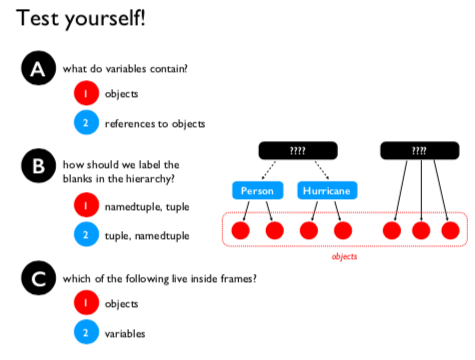

In [3]:
# Warmup 2a: Think first: What will the code print out?
#            See if the output matches your intuition.
#            Use PythonTutor to investigate further.
x = {}
y = x
y["WI"] = "Madison" 
print(x["WI"])

Madison


In [4]:
# Warmup 2b: Explain why Python produced the output in Warmup 2a
# Answer: x and y refer to the same dictionary. Because we change y, we change
#         the dictionary that they share, and thus both refer to {"WI": "Madison"}

In [5]:
# Warmup 3a: Think first: What will the code print out?
#            See if the output matches your intuition.
#            Use PythonTutor to investigate further.
def add_jello_by_append(my_list):
    my_list.append('jello')
    print(my_list)
    
shop_list = ['nutella', 'eggs']
print(shop_list)

add_jello_by_append(shop_list)

print(shop_list)

['nutella', 'eggs']
['nutella', 'eggs', 'jello']
['nutella', 'eggs', 'jello']


In [6]:
# Warmup 3b: Explain why Python produced the output in Warmup 3a
# Answer: Append is a mutator -- it changes the contents of a list.
#         shop_list and my_list refer to the same list, so when an item
#         is appended, it is reflected ("persisted") in both shop_list and my_list.

In [7]:
# Warmup 4a: Think first: What will the code print out?
#            See if the output matches your intuition.
#            Use PythonTutor to investigate further.
def add_jello_by_assignment(my_list):
    my_list = my_list + ['jello']
    print(my_list)
    
shop_list = ['nutella', 'eggs']
print(shop_list)

add_jello_by_assignment(shop_list)

print(shop_list)

['nutella', 'eggs']
['nutella', 'eggs', 'jello']
['nutella', 'eggs']


In [8]:
# Warmup 4b: Explain why Python produced the output in Warmup 4a
# Answer: Previously, we had said that the = operator assigns the
#         object on the right to the variable on the left.
#
#         More precisely, the = tells python to *point* the variable
#         on the left to the object on the right.
#
#         Therefore, in add_jello_by_assignment, my_list points to a *new* list,
#         which is the concatenation of my_list + ['jello'],
#         while shop_list remains pointed at the original list.

In [9]:
# Warmup 5a: Run the following code to create two dictionaries, a fun dictionary
#            and a not-so-fun dictionary. There is nothing else to do here.
fun_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 6 # on a scale of 1-10
    }
}

boring_dict = {
    "sailboat": {
        "definition": "a boat propelled by sails.",
        "usage": "she sailed the sailboat across the Mississippi",
        "fun_to_say": 3 # on a scale of 1-10
    },
    "canvas": {
        "definition": "a strong, coarse unbleached cloth.",
        "usage": "he painted on the canvas",
        "fun_to_say": 1 # on a scale of 1-10
    },
    "shoe": {
        "definition": "a covering for the foot.",
        "usage": "the shoe was worn and tattered",
        "fun_to_say": 2 # on a scale of 1-10
    }
}

In [10]:
# Warmup 5b: Write a function to change the usage of the specified word
#            to the new example sentence.

def change_usage(dict_to_change, word, new_example_sentence):
    dict_to_change[word]['usage'] = new_example_sentence

In [11]:
# Warmup 5c: Test your function! Call it with different inputs. Does it work?

print('sailboat usage before:', boring_dict['sailboat']['usage'])
print('bamboozle usage before:', fun_dict['bamboozle']['usage'])


sailboat usage before: she sailed the sailboat across the Mississippi
bamboozle usage before: Tom Sawyer bamboozled the neighborhood boys into painting for him


In [12]:
change_usage(boring_dict, 'sailboat', 'my sailboat crashed into the dock!')
change_usage(fun_dict, 'bamboozle', 'the Stormtroopers were bamboozled by Jedi mindtricks')

print('sailboat usage after:', boring_dict['sailboat']['usage'])
print('bamboozle usage after:', fun_dict['bamboozle']['usage'])

sailboat usage after: my sailboat crashed into the dock!
bamboozle usage after: the Stormtroopers were bamboozled by Jedi mindtricks


In [13]:
# Warmup 5d: Explain why it works. In particular, explain how we are changing the dictionary
#            *inside of a function*. How is that possible? What are the implications?

# A dictionary, like a list, is a mutable object. When we pass the fun or boring dictionary
# to the function, the function's dict_to_change will reference the same dictionary.
# Therefore, if we change any of the key-value mappings of dict_to_change, we will also
# be changing them for the caller as they refer to the same dictionary.
# Use PythonTutor to explore further!
# 
# This means that change_usage will mutate the dictionary. If we wanted to go back
# to a previous usage, we should have made a copy first.

# Copying

## Read

- [Sweigart Ch 4 ("References" through the end)](https://automatetheboringstuff.com/2e/chapter4/)

## Learning Objectives
After this lecture you will be able to...
 - Correctly predict the output of code that uses reference variable mutation and reassignment.
 - Compare and contrast the 3 levels of copying: 
    - **reference copy** 
    - **shallow copy** (copy.copy)
    - **deep copy** (copy.deepcopy)
 - Write code that copies a data structure at the appropriate level for a given use case. 



## Copying
- reference copy 
- shallow copy (copy.copy)  # one level of object depth
- deep copy (copy.deepcopy) # all levels of object depth

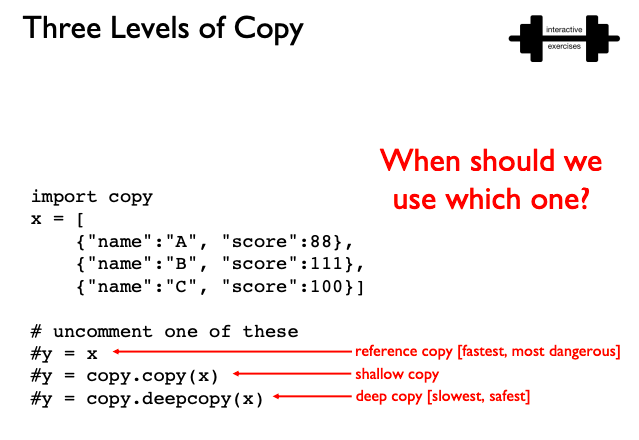

Link to [Python Tutor](https://pythontutor.com/render.html#code=%23%20Run%20this%20in%20Python%20Tutor,%20and%20uncomment%20one%20option%20at%20a%20time.%20%0A%0Aimport%20copy%0A%0Aw%20%3D%5B%0A%20%20%20%20%7B%22name%22%3A%22A%22,%20%22score%22%3A88%7D,%0A%20%20%20%20%7B%22name%22%3A%22B%22,%20%22score%22%3A111%7D,%0A%20%20%20%20%7B%22name%22%3A%22C%22,%20%22score%22%3A100%7D%5D%0A%0A%23x%20%3D%20w%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%20%23%20reference%20copy%0A%23y%20%3D%20copy.copy%28w%29%20%20%20%20%20%23%20shallow%20copy...copies%20the%20first%20level%0A%23z%20%3D%20copy.deepcopy%28w%29%20%23%20deep%20copy...copies%20down%20to%20every%20level&cumulative=false&curInstr=5&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false)

In [14]:
# Run this in Python Tutor, and uncomment one option at a time. 

import copy

w =[
    {"name":"A", "score":88},
    {"name":"B", "score":111},
    {"name":"C", "score":100}]

#x = w                # reference copy
#y = copy.copy(w)     # shallow copy...copies the first level
#z = copy.deepcopy(w) # deep copy...copies down to every level

# takeway:  Write a note to yourself


## Write code that copies a data structure at the appropriate level for a given use case. 


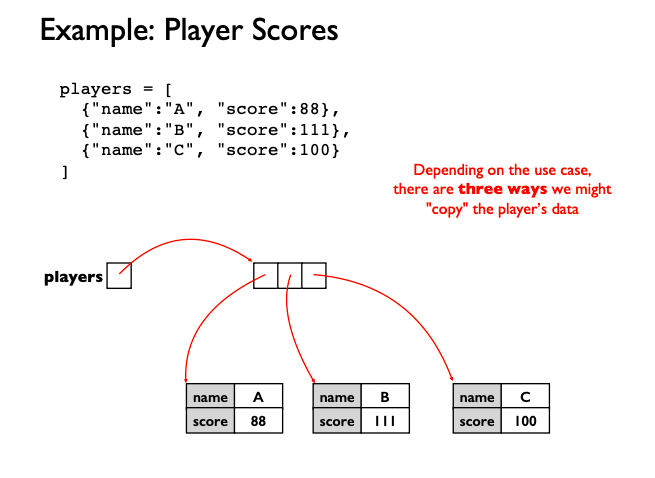

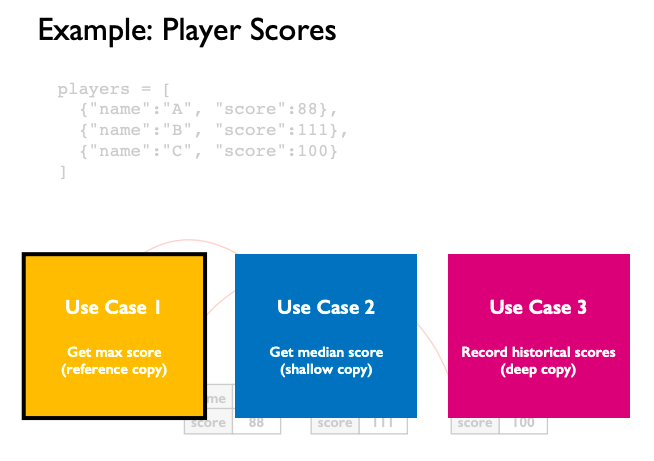

### Use Case 1: Get Max Score
Loop through each player's score and finds and returns the maximum score.

We only need to use a *reference copy* -- we shouldn't change the data in the function.

In [16]:
player_scores = [
    {"name":"Anna", "score":88},
    {"name":"Bianca", "score":111},
    {"name":"Carl", "score":100}
]

def max_score(score_list):
    high_score = None
    for person in score_list:
        if high_score == None or person['score'] > high_score:
            high_score = person['score']
    
    return high_score

print(player_scores)
print(max_score(player_scores))
print(player_scores)

# after you write this code, run it in Python Tutor

[{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]
111
[{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]


### Use Case 2: Get Median Score
Sort the dictionary by score and find the median player's score.

Since the list will need to be sorted, We should use a *shallow copy* to ensure that we don't change the data.

In [17]:
player_scores = [
    {"name":"Anna", "score":88},
    {"name":"Bianca", "score":111},
    {"name":"Carl", "score":100}
]

def median_score(score_list):
    
    # Make a shallow copy of score_list
    copied = copy.copy(score_list)
    
    # We have not learned this yet.
    # Do NOT use lambdas in your programs. You will lose points!
    # This is for demonstration purposes only.
    copied.sort(key = lambda person: person['score'])

    # Find the median
    len_copied = len(copied)
    med_score = None
    if len_copied % 2 == 0:
        left_mid = copied[len_copied // 2 - 1]['score']
        right_mid = copied[len_copied // 2]['score']
        med_score = (left_mid + right_mid) / 2
    else:
        med_score = copied[len_copied // 2]['score']
    
    # Return the median
    return med_score
    

print(player_scores)
print(median_score(player_scores))
print(player_scores)  # should be unchanged



[{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]
100
[{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]


### Use Case 3: Backup Scores
Create a backup of the original player_scores in case the user wants to revert their changes.

We should use a *deep copy* to ensure that we save all of the data.

In [18]:
player_scores = [
    {"name":"Anna", "score":88},
    {"name":"Bianca", "score":111},
    {"name":"Carl", "score":100}
]

# Create a deepcopy of player_scores
players_before = copy.deepcopy(player_scores)  
print('players_before:', players_before)

# Change Anna's score by 10
player_scores[0]["score"] += 10
print('player_scores:', player_scores)

answer = input("enter y to keep changes: ")
# TODO: Only keep the changes if the user types in 'y'
if answer != 'y':
    player_scores = players_before

# Print them both
print('players_before:', players_before)
print('player_scores:', player_scores)

# after you write this code, run it in Python Tutor

players_before: [{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]
player_scores: [{'name': 'Anna', 'score': 98}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]


enter y to keep changes:  n


players_before: [{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]
player_scores: [{'name': 'Anna', 'score': 88}, {'name': 'Bianca', 'score': 111}, {'name': 'Carl', 'score': 100}]


**Note:**  Deepcopy is also known as a Recursive copy. 

### Slice Copying
Think about it. What type of copy does slicing a list using [:] perform?

Try it [in Python Tutor](https://pythontutor.com/visualize.html#code=favorites%20%3D%20%5B%2017,%20%5B'Miles',%20'Gertie'%5D,%20%7B'a'%3A%2065,%20'b'%3A%2066,%20'c'%3A%2067%7D,%20True%5D%0Asliced%20%3D%20favorites%20%5B%3A%5D&cumulative=false&curInstr=0&heapPrimitives=nevernest&mode=display&origin=opt-frontend.js&py=3&rawInputLstJSON=%5B%5D&textReferences=false).

In [19]:
favorites = [ 17, ['Miles', 'Gertie'], {'a': 65, 'b': 66, 'c': 67}, True]
sliced = favorites [:]

# Answer: This is a shallow copy.

## Practice Using Worksheet
Open today's worksheet to practice your understanding of references; objects; tuples and namedtuples; and the 3 levels of copying.